<a href="https://colab.research.google.com/github/lucaspinheiro27/MACHINE_LEARNING_DATA_SCIENCE/blob/main/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


X, Y = make_classification(n_samples=50, n_features=20, n_informative=15, n_redundant=5,
                           random_state=7, n_classes=5)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [151]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [152]:
model = LinearDiscriminantAnalysis(n_components=2)
# model.fit(X_train, Y_train)
X_train_nda = model.fit_transform(X_train, Y_train)

Y_prev = model.predict(X_test)

print(accuracy_score(Y_test, Y_prev))
print(X_train_nda.shape)

0.23076923076923078
(37, 2)


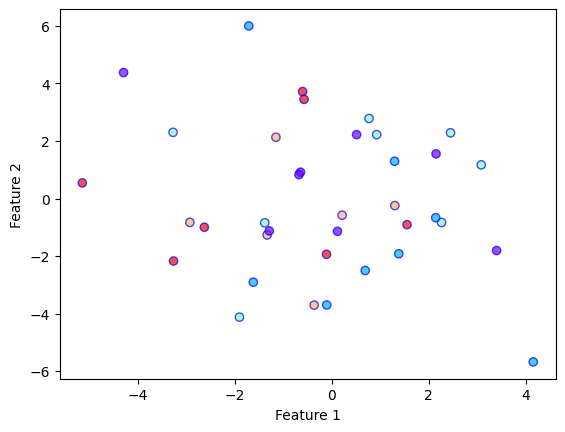

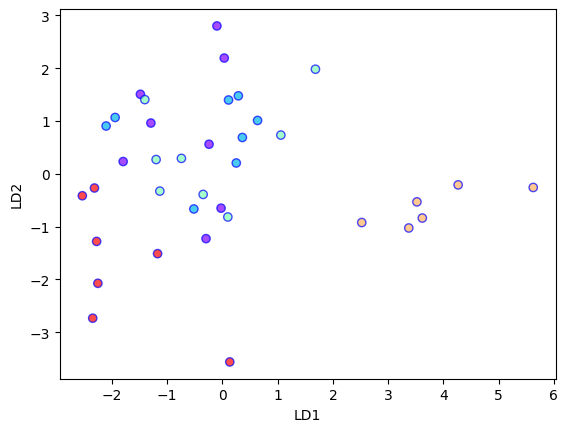

In [153]:
import matplotlib.pyplot as plt

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.show()

x_lda = model.fit_transform(X_train, Y_train)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(x_lda[:,0], x_lda[:,1], c=Y_train, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.show()

In [154]:
# diferentes
model = LinearDiscriminantAnalysis(n_components=2, solver='svd') # Singular Value Decomposition: mais features, melhor
model.fit(X_train, Y_train)
Y_prev = model.predict(X_test)
print(accuracy_score(Y_test, Y_prev))

model = LinearDiscriminantAnalysis(n_components=2, solver='lsqr', shrinkage=1) # mínimos quadrados, shrinkage tenta regularizar a covariância da amostra
model.fit(X_train, Y_train)
Y_prev = model.predict(X_test)
print(accuracy_score(Y_test, Y_prev))

0.23076923076923078
0.46153846153846156


# Wine

In [155]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Wine.csv")
unico = np.unique(df['Customer_Segment'])
unico

array([1, 2, 3])

In [157]:
for i in range(1, 4):
    df[f'cs_{i}'] = (df['Customer_Segment'] == i).astype(int)
df_tratado = df.drop("Customer_Segment", axis='columns')
df_tratado['Alcohol'] = df_tratado['Alcohol'].apply(np.ceil)
df_tratado

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cs_1,cs_2,cs_3
0,15.0,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,0,0
1,14.0,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,0,0
2,14.0,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,0,0
3,15.0,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,0,0
4,14.0,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,14.0,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0,0,1
174,14.0,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0,0,1
175,14.0,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0,0,1
176,14.0,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0,0,1


In [158]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [159]:
df_tratado.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline', 'cs_1',
       'cs_2', 'cs_3'],
      dtype='object')

In [160]:
colunas = ['Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline', 'cs_1',
       'cs_2', 'cs_3']

In [161]:
X_train, X_test, Y_train, Y_test = train_test_split(df_tratado[colunas],
        df_tratado[['Alcohol']], test_size=0.25, random_state=42)

In [162]:
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred).round(2))

Accuracy: 0.64


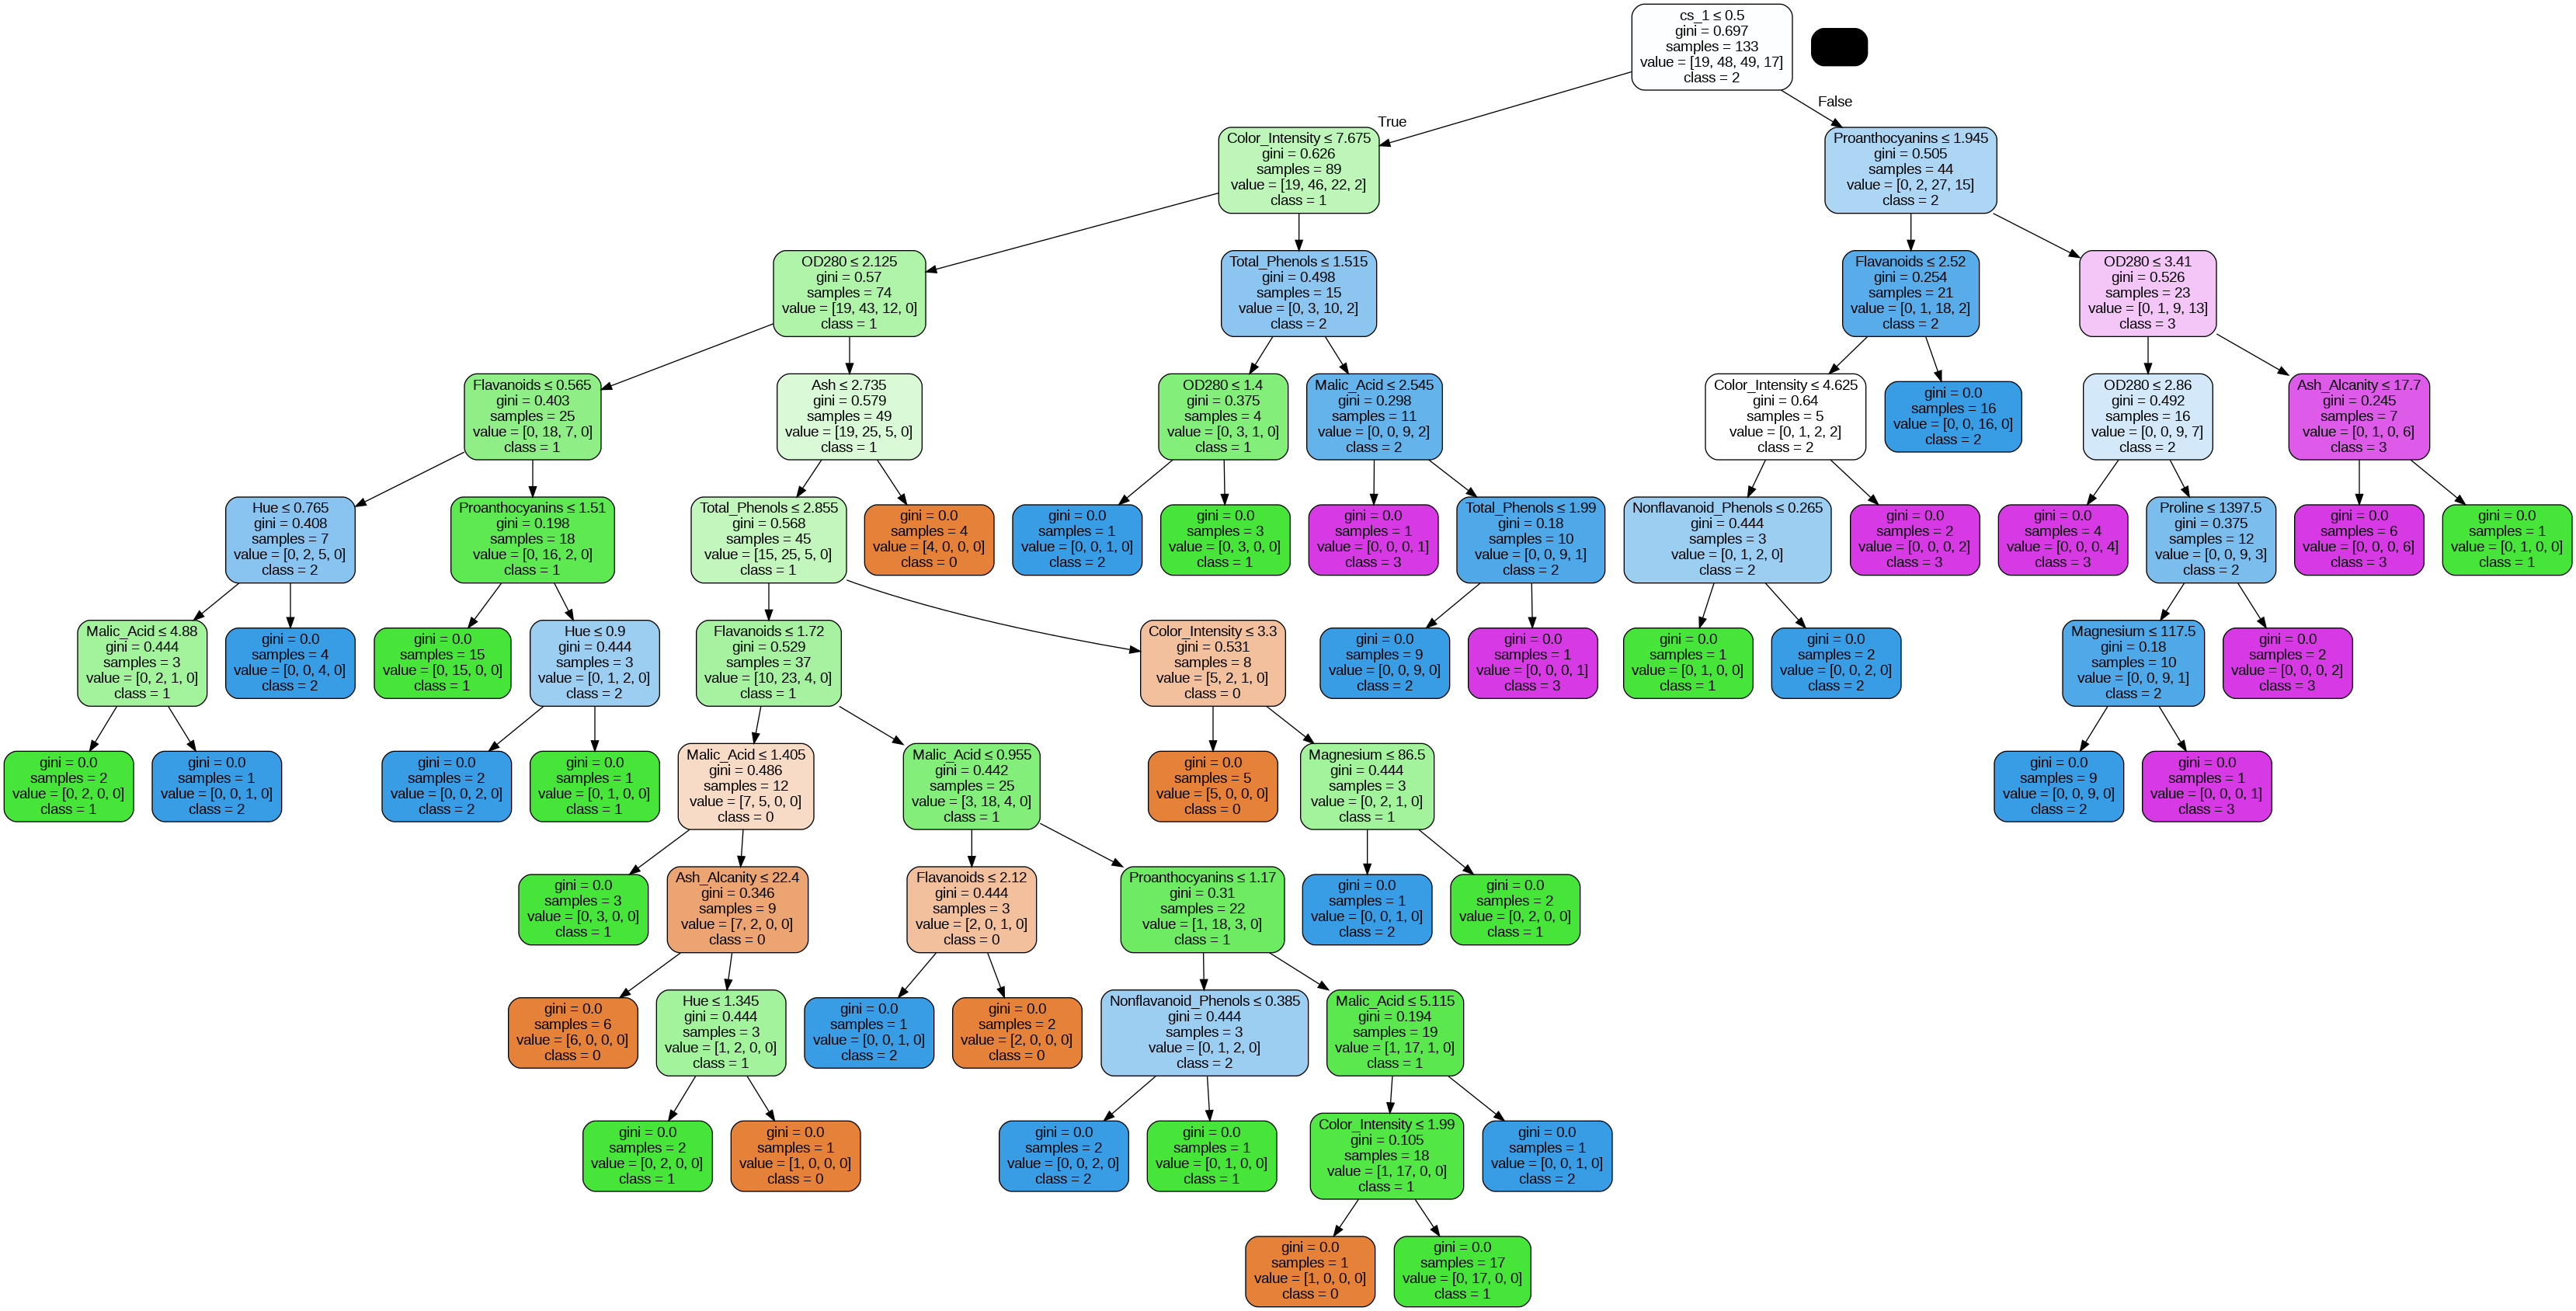

In [163]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.tree import export_graphviz
import pydotplus
class_names = [str(i) for i in range(14)]

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = colunas, class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('image1.png')
Image(graph.create_png())

In [164]:
classifier = DecisionTreeClassifier(criterion = 'log_loss', min_samples_leaf=1, max_depth=4)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred).round(2))

Accuracy: 0.53


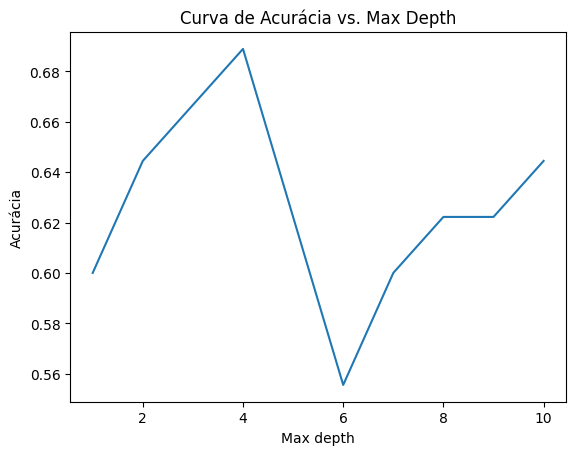

In [165]:
acuracias = []
for max_depth in range(1, 11):
  modelo = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
  modelo.fit(X_train, Y_train)
  y_pred = modelo.predict(X_test)
  acuracia = accuracy_score(Y_test, y_pred)
  acuracias.append(acuracia)

plt.plot(range(1, 11), acuracias)
plt.xlabel("Max depth")
plt.ylabel("Acurácia")
plt.title("Curva de Acurácia vs. Max Depth")
plt.show()

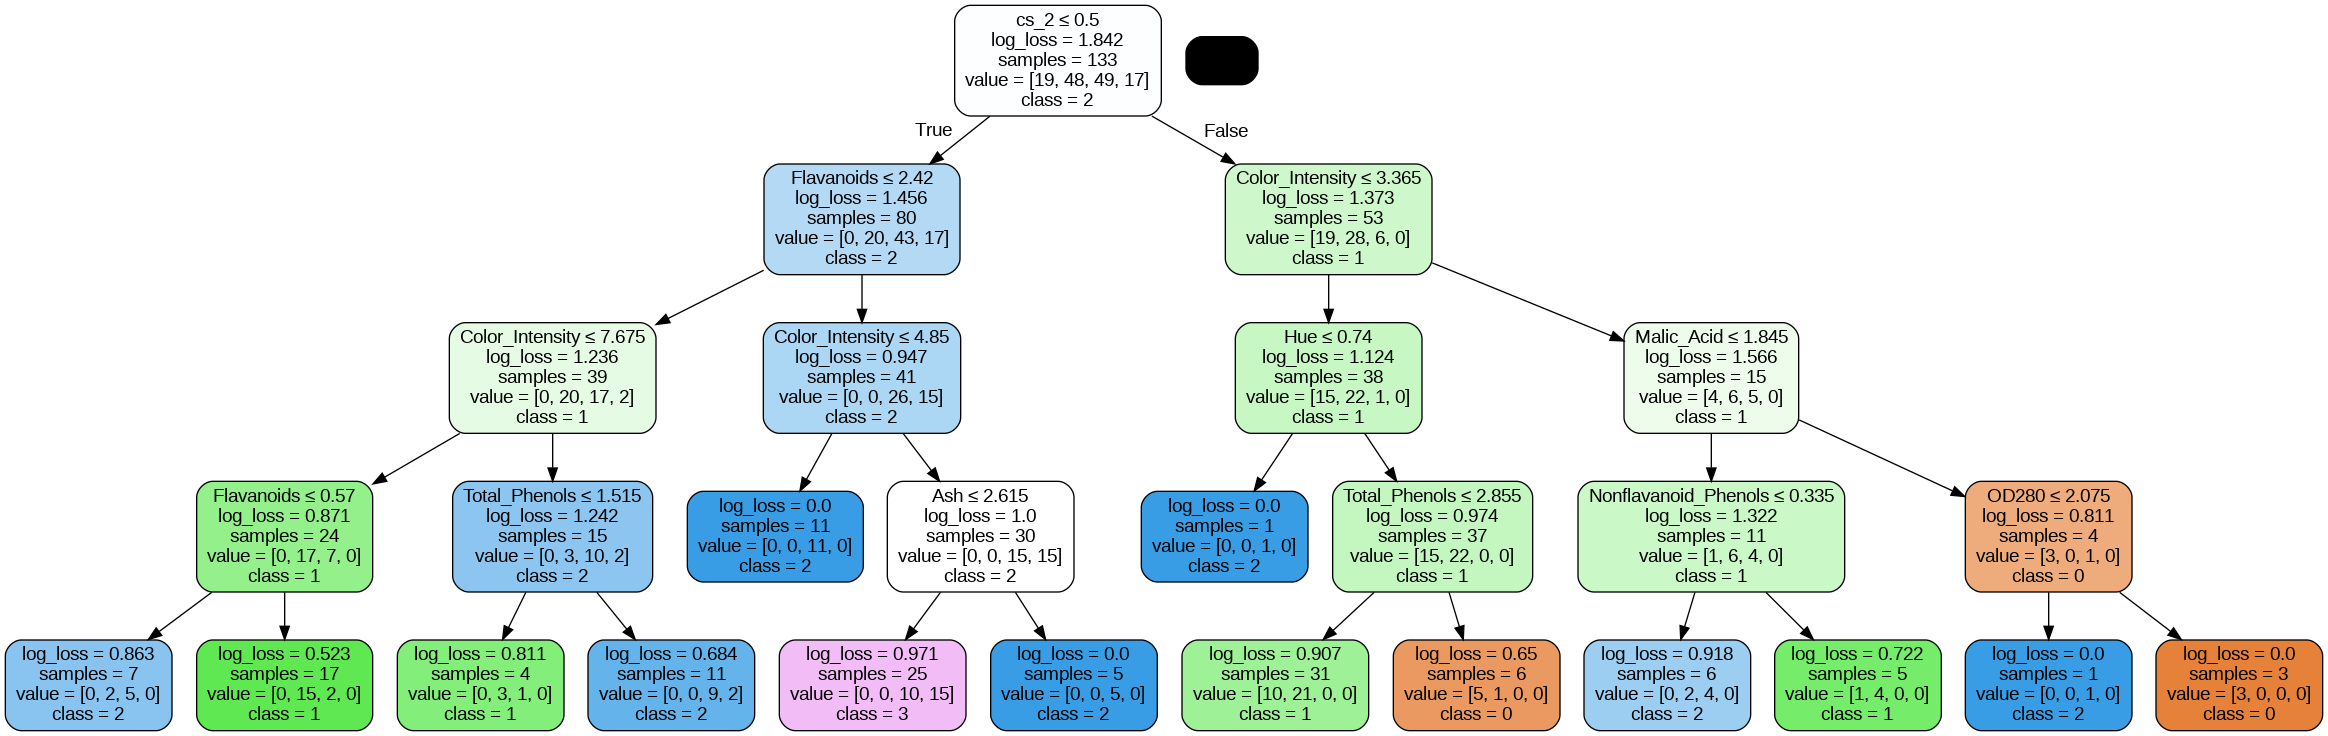

In [166]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
class_names = [str(i) for i in range(14)]

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = colunas,
                class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('image2.png')
Image(graph.create_png())

In [167]:
from sklearn.ensemble import RandomForestClassifier
classificador_random = RandomForestClassifier(oob_score=True, n_estimators=10, random_state=42)
classificador_random.fit(X_train, Y_train.values.ravel())
y_pred = classificador_random.predict(X_test)
print("Acurácia:",metrics.accuracy_score(Y_test, y_pred).round(2))
print("Acurácia OOB:", classificador_random.oob_score_.round(2))

Acurácia: 0.64
Acurácia OOB: 0.46


In [168]:
lista_n_estimators = [10, 100, 1000]
criterios_list = ['gini', 'log_loss']
max_depth_list = range(1, 11)
resultados = []

In [169]:
for n_estimator in lista_n_estimators:
  for criterio in criterios_list:
    for max_depth in max_depth_list:
      modelo = RandomForestClassifier(n_estimators=n_estimator, criterion=criterio, max_depth=max_depth, random_state=42)
      modelo.fit(X_train, Y_train.values.ravel())
      y_pred = modelo.predict(X_test)
      acuracia = accuracy_score(Y_test, y_pred)
      resultados.append((n_estimator, criterio, max_depth, acuracia))

In [170]:
resultados_df = pd.DataFrame(resultados, columns=['n_estimators', 'criterio', 'max_depth', 'acuracia'])
resultados_df

,n_estimators,criterio,max_depth,acuracia
0,10,gini,1,0.711111
1,10,gini,2,0.577778
2,10,gini,3,0.577778
3,10,gini,4,0.666667
4,10,gini,5,0.555556
5,10,gini,6,0.600000
6,10,gini,7,0.600000
7,10,gini,8,0.622222
8,10,gini,9,0.666667
9,10,gini,10,0.644444


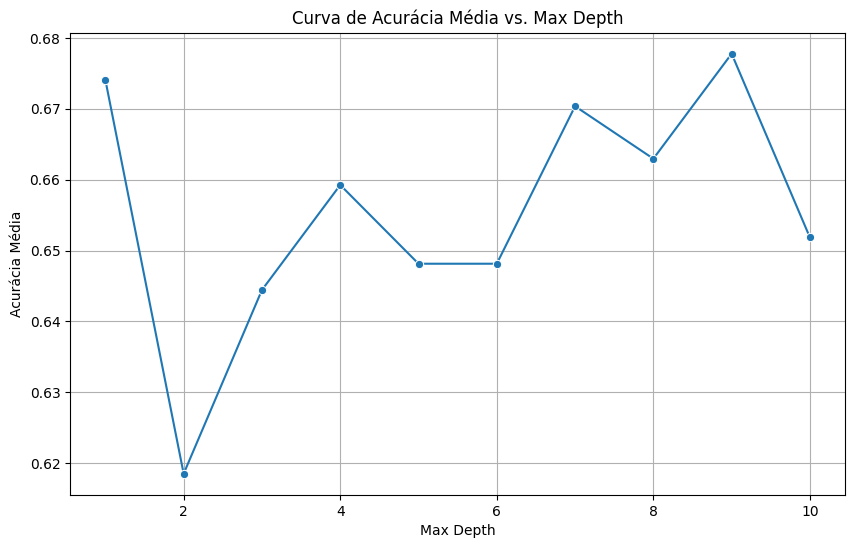

   max_depth  acuracia
0          1  0.674074
1          2  0.618519
2          3  0.644444
3          4  0.659259
4          5  0.648148
5          6  0.648148
6          7  0.670370
7          8  0.662963
8          9  0.677778
9         10  0.651852


In [171]:
import matplotlib.pyplot as plt
import seaborn as sns
resultados_agrupados = resultados_df.groupby('max_depth')['acuracia'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=resultados_agrupados, x='max_depth', y='acuracia', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Acurácia Média')
plt.title('Curva de Acurácia Média vs. Max Depth')
plt.grid(True)
plt.show()
print(resultados_agrupados)

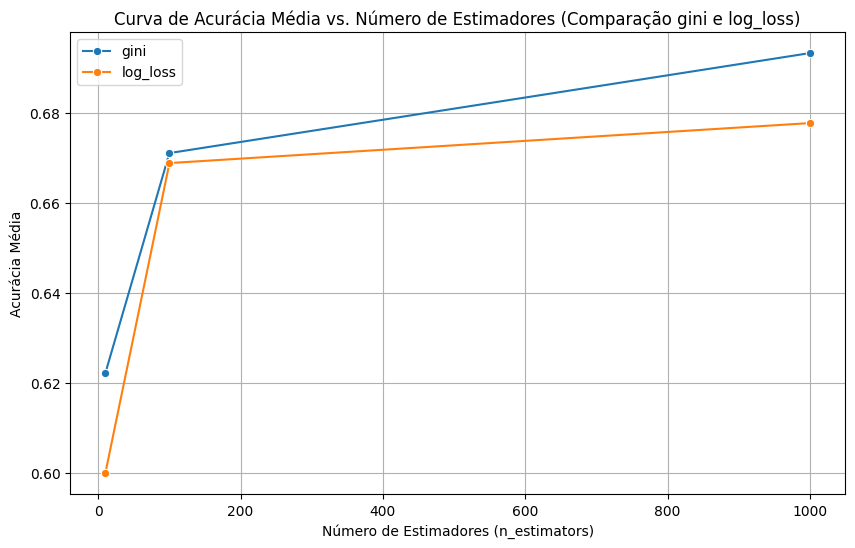

Resultados para critério 'gini':
   n_estimators  acuracia
0            10  0.622222
1           100  0.671111
2          1000  0.693333

Resultados para critério 'log_loss':
   n_estimators  acuracia
0            10  0.600000
1           100  0.668889
2          1000  0.677778


In [172]:
resultados_gini = resultados_df[resultados_df['criterio'] == 'gini']
resultados_gini_agrupados = resultados_gini.groupby('n_estimators')['acuracia'].mean().reset_index()

resultados_log_loss = resultados_df[resultados_df['criterio'] == 'log_loss']
resultados_log_loss_agrupados = resultados_log_loss.groupby('n_estimators')['acuracia'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=resultados_gini_agrupados, x='n_estimators', y='acuracia', marker='o', label='gini')
sns.lineplot(data=resultados_log_loss_agrupados, x='n_estimators', y='acuracia', marker='o', label='log_loss')
plt.xlabel('Número de Estimadores (n_estimators)')
plt.ylabel('Acurácia Média')
plt.title('Curva de Acurácia Média vs. Número de Estimadores (Comparação gini e log_loss)')
plt.legend()
plt.grid(True)
plt.show()

print("Resultados para critério 'gini':")
print(resultados_gini_agrupados)
print("\nResultados para critério 'log_loss':")
print(resultados_log_loss_agrupados)

In [173]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [174]:
model = LinearDiscriminantAnalysis(n_components=2)
# model.fit(X_train, Y_train)
Y_train = Y_train.values.ravel()
X_train_nda = model.fit_transform(X_train, Y_train)

Y_prev = model.predict(X_test)

print(accuracy_score(Y_test, Y_prev).round(2))
print(X_train_nda.shape)

0.53
(133, 2)


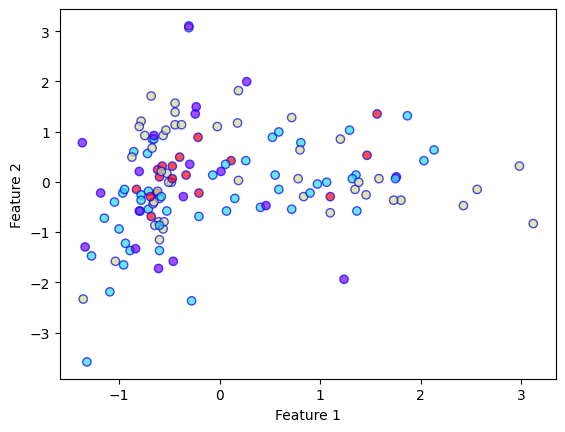

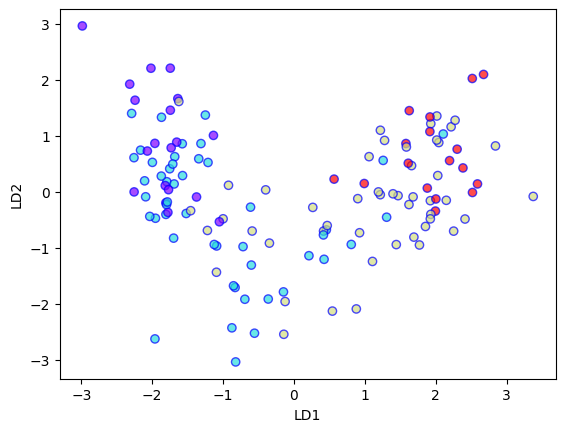

In [175]:
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.show()

x_lda = model.fit_transform(X_train, Y_train)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(x_lda[:,0], x_lda[:,1], c=Y_train, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.show()

In [176]:
model = LinearDiscriminantAnalysis(n_components=2, solver='svd') # Singular Value Decomposition: mais features, melhor
model.fit(X_train, Y_train)
Y_prev = model.predict(X_test)
print(accuracy_score(Y_test, Y_prev).round(2))

model = LinearDiscriminantAnalysis(n_components=2, solver='lsqr', shrinkage=1) # mínimos quadrados, shrinkage tenta regularizar a covariância da amostra
model.fit(X_train, Y_train)
Y_prev = model.predict(X_test)
print(accuracy_score(Y_test, Y_prev).round(2))

model = QuadraticDiscriminantAnalysis()
model.fit(X_train, Y_train)
Y_prev = model.predict(X_test)
print(accuracy_score(Y_test, Y_prev).round(2))

0.53
0.36
0.51


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
